The purpose of the script is to visualize the slope aspect, hillshade.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from osgeo import osr, ogr
!pip install gdal
from osgeo import gdal

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 44.0 MB/s eta 0:00:00


In [ ]:
import rasterio

In [ ]:
from rasterio.transform import from_origin
from rasterio.warp import calculate_default_transform, reproject,Resampling
from rasterio.plot import show
from rasterio.features import shapes

In [ ]:
!pip install richdem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.4/329.4 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for richdem: filename=richdem-0.3.4-cp310-cp310-linux_x86_64.whl size=7844534 sha256=5ae41bf2b7d95bdad445dda35f3292da144832c99fdc64fbf61eba2871e801c0
  Stored in directory: /root/.cache/pip/wheels/01/61/27/5c305116b5cffecf04ed75c40f640e2baf231dae20954e31e0
Successfully built richdem


In [ ]:
import richdem as rd

Source of data: https://earthexplorer.usgs.gov/

Data exploration

In [ ]:
os.chdir("/content/drive/MyDrive/Dane z Kaggla/Elevation/Elevation_input")
!ls

aspect.tif		   hill.tif		 slopePer_n50_e016_1arc_v3.tif
hill_n50_e016_1arc_v3.tif  n50_e016_1arc_v3.tif  slopePer_n50_e019_1arc_v3.tif
hill_n50_e019_1arc_v3.tif  n50_e019_1arc_v3.tif  slopePer_n50_e020_1arc_v3.tif
hill_n50_e020_1arc_v3.tif  n50_e020_1arc_v3.tif  slope.tif


In [ ]:
src_Path = '/content/drive/MyDrive/Dane z Kaggla/Elevation/Elevation_input'

In [ ]:
input_files = [r for r in os.listdir(src_Path) if r.startswith('n50')]
input_files

['n50_e016_1arc_v3.tif', 'n50_e019_1arc_v3.tif', 'n50_e020_1arc_v3.tif']

Getting information about projection and transform.

In [ ]:
def crs_of_files(files):
    for file in files:
        with rasterio.open(file) as src:
            crs = src.crs
            transform = src.transform
            print(f"CRS of {file}: {crs}")
            print(f'transform of {file}: {transform}')

In [ ]:
crs_of_files(input_files)

CRS of n50_e016_1arc_v3.tif: EPSG:4326
transform of n50_e016_1arc_v3.tif: | 0.00, 0.00, 16.00|
| 0.00,-0.00, 51.00|
| 0.00, 0.00, 1.00|
CRS of n50_e019_1arc_v3.tif: EPSG:4326
transform of n50_e019_1arc_v3.tif: | 0.00, 0.00, 19.00|
| 0.00,-0.00, 51.00|
| 0.00, 0.00, 1.00|
CRS of n50_e020_1arc_v3.tif: EPSG:4326
transform of n50_e020_1arc_v3.tif: | 0.00, 0.00, 20.00|
| 0.00,-0.00, 51.00|
| 0.00, 0.00, 1.00|


In [ ]:
def chart(input):
  ds = gdal.Open(input)
  ds_array = ds.GetRasterBand(1).ReadAsArray()
  plt.figure()
  plt.imshow(ds_array, cmap = 'gray')
  plt.colorbar()
  plt.show()


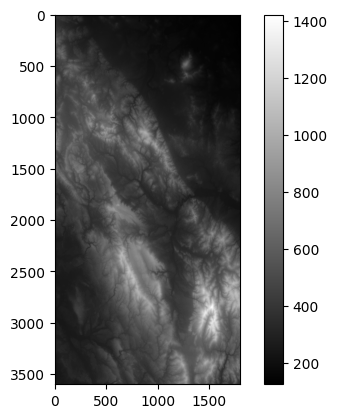

In [ ]:
raster1 = 'n50_e016_1arc_v3.tif'
chart(raster1)

Calculation slope, aspect, hillshade.

In [ ]:
ds = gdal.Open('n50_e019_1arc_v3.tif')

In [ ]:
slp = gdal.DEMProcessing('slope.tif', ds,'slope', computeEdges = True)
slpArray = slp.GetRasterBand(1).ReadAsArray()

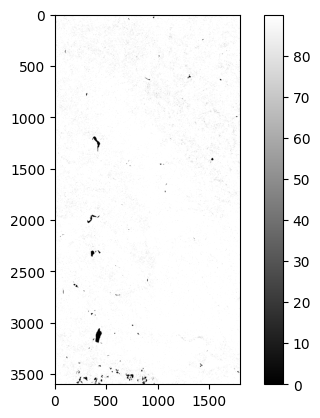

In [ ]:
plt.figure()
plt.imshow(slpArray, cmap = 'gray')
plt.colorbar()
plt.show()

In [ ]:
asp = gdal.DEMProcessing('aspect.tif', ds,'aspect', computeEdges = True)
aspArray = asp.GetRasterBand(1).ReadAsArray()

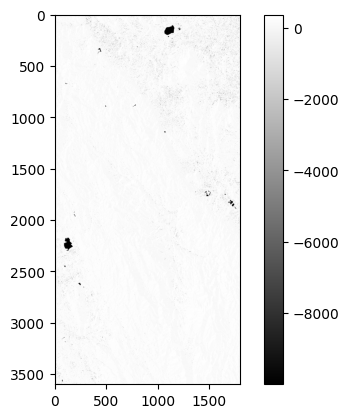

In [ ]:
plt.figure()
plt.imshow(aspArray, cmap = 'gray')
plt.colorbar()
plt.show()

In [ ]:
hill = gdal.DEMProcessing('hill.tif', ds,'hillshade', computeEdges = True)
hillArray = hill.GetRasterBand(1).ReadAsArray()

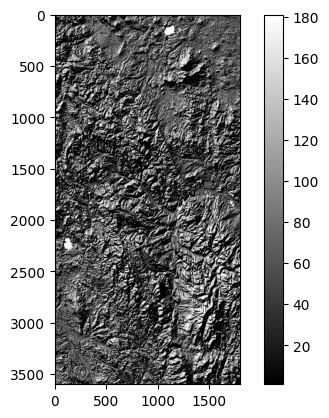

In [ ]:
plt.figure()
plt.imshow(hillArray, cmap = 'gray')
plt.colorbar()
plt.show()

Calculation of hillshade.

In [ ]:
def calculate_hill_GDAL(input_file, output_file):
    # Open the source DEM file
    src_ds = gdal.Open(input_file)
    if src_ds is None:
        raise Exception(f"Unable to open input file {input_file}")

    # Perform the slope calculation
    gdal.DEMProcessing(output_file, src_ds, 'hillshade', format='GTiff')
    # gdal.Warp( input_file, output_file, dstSRS = 'EPSG:4326')



    # Close the source dataset
    src_ds = None
    print(f"Hillshade file saved as {output_file}")

In [ ]:
src_path = '/content/drive/MyDrive/Dane z Kaggla/Elevation/Elevation_input'
input_files = [r for r in os.listdir(src_path) if r.startswith('n50')]
input_files


['n50_e016_1arc_v3.tif', 'n50_e019_1arc_v3.tif', 'n50_e020_1arc_v3.tif']

In [ ]:
output_files_hill = []
for srcRst in input_files:
  dstRst = 'hill_' + srcRst[:-4] +srcRst[-4:]
  output_files_hill.append(dstRst)

In [ ]:
output_files_hill

['hill_n50_e016_1arc_v3.tif',
 'hill_n50_e019_1arc_v3.tif',
 'hill_n50_e020_1arc_v3.tif']

In [ ]:
for input, output in zip(input_files, output_files_hill):
  calculate_hill_GDAL(input, output)

Hillshade file saved as hill_n50_e016_1arc_v3.tif
Hillshade file saved as hill_n50_e019_1arc_v3.tif
Hillshade file saved as hill_n50_e020_1arc_v3.tif


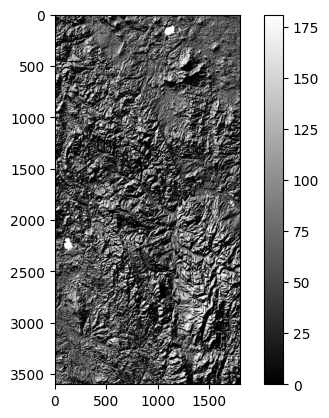

In [ ]:
hill_1 = 'hill_n50_e016_1arc_v3.tif'
wykres(hill_1)


Calculation of slope GDAL.

In [ ]:
def calculate_slope_GDAL(input_file, output_file):
    # Open the source DEM file
    src_ds = gdal.Open(input_file)
    if src_ds is None:
        raise Exception(f"Unable to open input file {input_file}")

    # Perform the slope calculation
    gdal.DEMProcessing(output_file, src_ds, 'slope', format='GTiff')
    # gdal.Warp( input_file, output_file, dstSRS = 'EPSG:4326')



    # Close the source dataset
    src_ds = None
    print(f"Slope file saved as {output_file}")

In [ ]:
output_files_slope = []
for srcRst in input_files:
  dstRst = 'slope_' + srcRst[:-4] +srcRst[-4:]
  output_files_slope.append(dstRst)

output_files_slope

['slope_n50_e016_1arc_v3.tif',
 'slope_n50_e019_1arc_v3.tif',
 'slope_n50_e020_1arc_v3.tif']

In [ ]:
for input, output in zip(input_files, output_files_slope):
  calculate_slope_GDAL(input, output)

Slope file saved as slope_n50_e016_1arc_v3.tif
Slope file saved as slope_n50_e019_1arc_v3.tif
Slope file saved as slope_n50_e020_1arc_v3.tif


Calculation slope percentage RICHDEM.

In [ ]:
def calculate_slope_rich(input_file, output_file):
  # Open the source rich file
    dem = rd.LoadGDAL(input_file)
    if dem is None:
        raise Exception(f"Unable to open input file {input_file}")
  # Perform the slope calculation
    slope= rd.TerrainAttribute(dem, attrib = 'slope_percentage')
    rd.SaveGDAL(output_file, slope)
  # Close the source dataset
    dem = None
    print(f"Slope file saved as {output_file}")


In [ ]:
output_files_slope = []
for srcRst in input_files:
  dstRst = 'slopePer_' + srcRst[:-4] +srcRst[-4:]
  output_files_slope.append(dstRst)

output_files_slope

['slopePer_n50_e016_1arc_v3.tif',
 'slopePer_n50_e019_1arc_v3.tif',
 'slopePer_n50_e020_1arc_v3.tif']

In [ ]:
for input, output in zip(input_files, output_files_slope):
  calculate_slope_rich(input, output)

Slope file saved as slopePer_n50_e016_1arc_v3.tif
Slope file saved as slopePer_n50_e019_1arc_v3.tif
Slope file saved as slopePer_n50_e020_1arc_v3.tif


Next steps: Calculation of mask (treshold) for slope 15% which coresponds with values of pixel below 1600000 and then polygonizing areas with a slope below 15%.